<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

# Introduce yourself

**Team:** choco boy

**Members:** Nikolay Skudnyakov, Aleksandr Mamontov, Maria Ignatyeva (BSE162)

# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Given information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [0]:
!wget https://www.dropbox.com/s/mbkjgb4p3ymm1ds/train.tsv

--2019-06-14 20:33:12--  https://www.dropbox.com/s/mbkjgb4p3ymm1ds/train.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mbkjgb4p3ymm1ds/train.tsv [following]
--2019-06-14 20:33:12--  https://www.dropbox.com/s/raw/mbkjgb4p3ymm1ds/train.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc67c3fda6a715806e755b18031.dl.dropboxusercontent.com/cd/0/inline/Ai3ijamYCSp6EG2h--Sr2Y5acls_2BiJCMaXmoShuEUDQfJyiPD6BYWQaW75iiEAV8EtXNxq4O1vmDbJtME38qdcsc15cL3n7FFT53kD8BQH9w/file# [following]
--2019-06-14 20:33:13--  https://ucc67c3fda6a715806e755b18031.dl.dropboxusercontent.com/cd/0/inline/Ai3ijamYCSp6EG2h--Sr2Y5acls_2BiJCMaXmoShuEUDQfJyiPD6BYWQaW75iiEAV8EtXNxq4O1vmDbJtME38qdcsc15cL3n7FFT53kD8BQH9w/file
Resolving ucc67c3fda6a715806

In [0]:
df = pd.read_csv('./train.tsv', sep='\t', index_col=0)
df.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


In [0]:
df['delivery_available'] = df['delivery_available'].astype('int')
df['payment_available'] = df['payment_available'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351281 entries, 1 to 508548
Data columns (total 19 columns):
category_id           351281 non-null int64
city                  351281 non-null object
date_created          351281 non-null object
delivery_available    351281 non-null int64
desc_text             351281 non-null object
img_num               351281 non-null int64
lat                   351281 non-null float64
long                  351281 non-null float64
name_text             351281 non-null object
owner_id              351281 non-null object
payment_available     351281 non-null int64
price                 351281 non-null float64
product_id            351281 non-null object
product_type          351281 non-null int64
properties            351281 non-null object
region                351281 non-null object
sold_mode             351281 non-null int64
subcategory_id        351281 non-null int64
sold_fast             351281 non-null int64
dtypes: float64(3), int64(8), object(8)

# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

**Classes in the dataset are imbalances: number of objects with class 0 is triple greater than with class 1**

In [0]:
print('class 0:', sum(df['sold_fast'] == 0))
print('class 1:', sum(df['sold_fast'] == 1))
print('ration class 1 / class 0:', sum(df['sold_fast'] == 1) / sum(df['sold_fast'] == 0))

class 0: 270201
class 1: 81080
ration class 1 / class 0: 0.30007290868649633


**Number of unique values of *owner_id* and *product_id* is equal or almost equal to objects number, so we'll delete these features from the dataset.**

In [0]:
print('product_id:', len(df['product_id'].unique()))
print('owner_id:', len(df['owner_id'].unique()))

product_id: 351281
owner_id: 305336


**Feature *properties* is very heterogeneous and repeats the values of features *name_text*, *category_id*, *desc_text* and some others. So we'll also delete this feature.**

In [0]:
df['properties'].values[345:355]

array(["[{'slug_id': 'sobstvennik_ili_agent', 'slug_name': 'Кто разместил', 'value': 'Собственник', 'value_id': 10705}, {'slug_id': 'realty_etajnost_doma', 'slug_name': 'Этажность дома (realty_etajnost_doma)', 'value': '9', 'value_id': 9}, {'slug_id': 'sanuzli', 'slug_name': 'Санузлы', 'value': 'Совмещенный', 'value_id': 10695}, {'slug_id': 'holodilnik', 'slug_name': 'Холодильник', 'value': 'Есть', 'value_id': 10780}, {'slug_id': 'posudomoechnaya_mashina', 'slug_name': 'Посудомоечная машина', 'value': 'Нет', 'value_id': 10785}, {'slug_id': 'kommunalnie_uslugi_vhodyat', 'slug_name': 'Коммунальные услуги', 'value': 'Включены', 'value_id': 10793}, {'slug_id': 'realty_infrastructure', 'slug_name': 'Инфраструктура около дома (realty_infrastructure)', 'value': 'Магазины', 'value_id': 12031}, {'slug_id': 'realty_infrastructure', 'slug_name': 'Инфраструктура около дома (realty_infrastructure)', 'value': 'Школа', 'value_id': 12028}, {'slug_id': 'realty_infrastructure', 'slug_name': 'Инфраструкт

**Let's parse *date_created* into year, month and date. There is only one unique value of years, so we'll add only months and days to the training dataset.**

In [0]:
years = df['date_created'].apply(lambda date: int(date.split('-')[0]))
months = df['date_created'].apply(lambda date: int(date.split('-')[1]))
days = df['date_created'].apply(lambda date: int(date.split('-')[2]))

In [0]:
print('years:', years.unique())
print('months:', months.unique())
print('days:', days.unique())

years: [2018]
months: [10  6  7  4  2  3  5  1  8  9]
days: [ 8 18 31 17  9 28 14  2 20 29  4 25 24  3 11  6 22  5 10 15 27  1 13 26
 19 16 21 12 23  7 30]


In [0]:
df['month_created'] = months
df['day_created'] = days

**Features *lat* an *long* depend on location that is represented by features *region* and *city*. Let's delete *lat* and *long* as well.**

In [0]:
cols_to_del = ['product_id', 'owner_id', 'properties', 'lat', 'long', 'date_created']
df = df.drop(cols_to_del, axis=1)
df.shape

(351281, 15)

**Let's plot features dependence on target variable**

In [0]:
df.columns

Index(['category_id', 'city', 'delivery_available', 'desc_text', 'img_num',
       'name_text', 'payment_available', 'price', 'product_type', 'region',
       'sold_mode', 'subcategory_id', 'sold_fast', 'month_created',
       'day_created'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


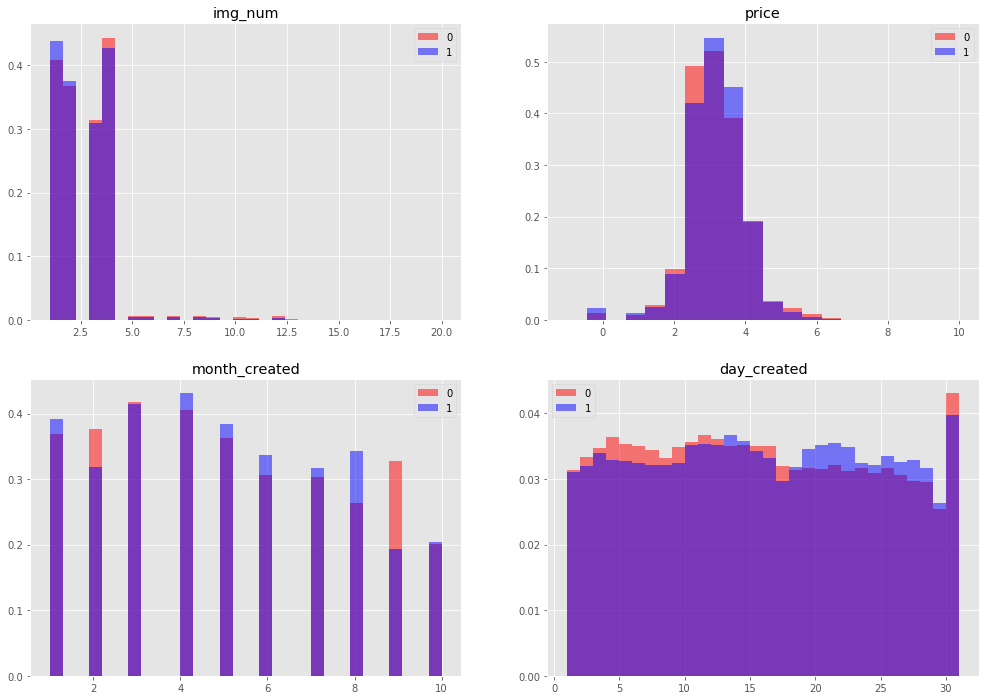

In [0]:
cols_to_hist = ['img_num', 'price', 'month_created', 'day_created']

fig, ax = plt.subplots(2, 2, figsize=(17, 12))

for i, col in enumerate(cols_to_hist):  
  values = df[col]
  bins = 30
  if col == 'price':
    values = np.log10(df[col])
    bins = np.linspace(-1, 10, 21)
    
  ax[i // 2, i % 2].hist(values[df['sold_fast'] == 0], bins=bins, label='0', color='r', alpha=0.5, density=True)
  ax[i // 2, i % 2].hist(values[df['sold_fast'] == 1], bins=bins, label='1', color='b', alpha=0.5, density=True)
  ax[i // 2, i % 2].set_title(col)
  ax[i // 2, i % 2].legend()

In plots with probabilities below features values that occur only once in the dataset are not considered

In [0]:
def unique_values_bars(data, feature_name, n_top=None):
    
    # Feature values
    feature_values = data[feature_name].values

    # Target labels
    labels = data['sold_fast'].values

    # Unique values
    unique, counts = np.unique(feature_values, return_counts=True)
    
    print("Number of unique values: ", len(unique))
    
    if n_top is None:
        n_top = 10**6
        
    unique_1 = unique[counts.argsort()][-n_top:]
    counts_1 = counts[counts.argsort()][-n_top:]
        
    plt.figure(figsize=(9, 0.25 * len(unique_1)))
    plt.barh(y=range(len(unique_1)), width=counts_1)
    plt.yticks(range(len(unique_1)), unique_1, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Number of values', size=14)
    plt.title(feature_name)
    plt.grid(b=1)
    plt.show()

    probas = []
    for i, aval in enumerate(unique):
      if counts[i] == 1:
        probas.append(0)
        continue
      labels_for_val = labels[feature_values == aval]
      n = len(labels_for_val)
      n_1 = len(labels_for_val[labels_for_val == 1])
      p = 1.0 * n_1 / n
      probas.append(p)
    probas = np.array(probas)

    unique_2 = unique[probas.argsort()][-n_top:]
    probas_2 = probas[probas.argsort()][-n_top:]

    plt.figure(figsize=(9, 0.25 * len(unique_2)))
    plt.barh(y=range(len(unique_2)), width=probas_2)
    plt.yticks(range(len(unique_2)), unique_2, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Probability to be sold (class 1)', size=14)    
    plt.title(feature_name)
    plt.grid(b=1)
    plt.show()
    
    probas = []
    for i, aval in enumerate(unique):
      if counts[i] == 1:
        probas.append(0)
        continue
      labels_for_val = labels[feature_values == aval]
      n = len(labels_for_val)
      n_1 = len(labels_for_val[labels_for_val == 0])
      p = 1.0 * n_1 / n
      probas.append(p)
    probas = np.array(probas)

    unique_2 = unique[probas.argsort()][-n_top:]
    probas_2 = probas[probas.argsort()][-n_top:]

    plt.figure(figsize=(9, 0.25 * len(unique_2)))
    plt.barh(y=range(len(unique_2)), width=probas_2)
    plt.yticks(range(len(unique_2)), unique_2, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Probability not to be sold (class 0)', size=14)
    plt.title(feature_name)
    plt.grid(b=1)
    plt.show()

Number of unique values:  24


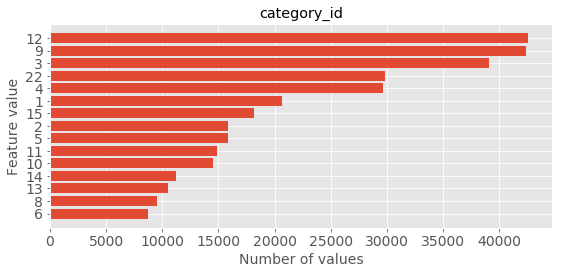

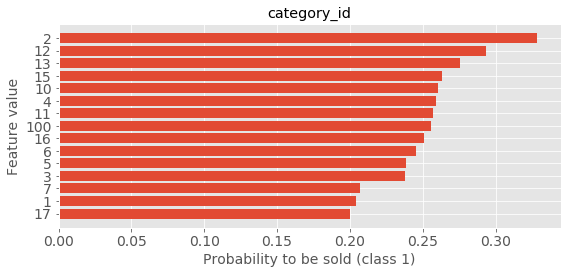

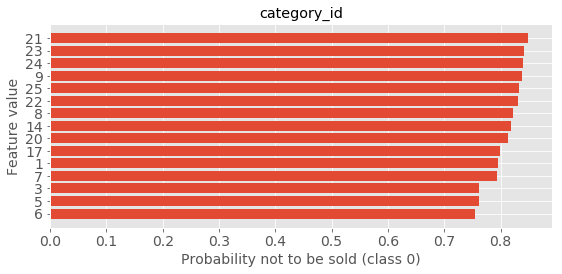

In [0]:
unique_values_bars(df, 'category_id', n_top=15)

Number of unique values:  281


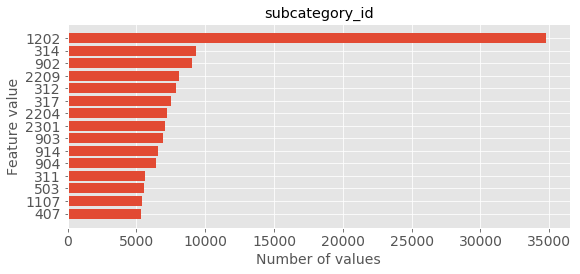

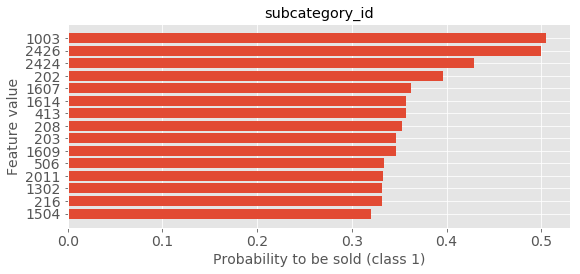

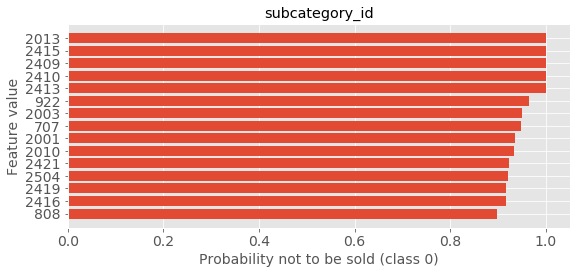

In [0]:
unique_values_bars(df, 'subcategory_id', n_top=15)

Number of unique values:  2299


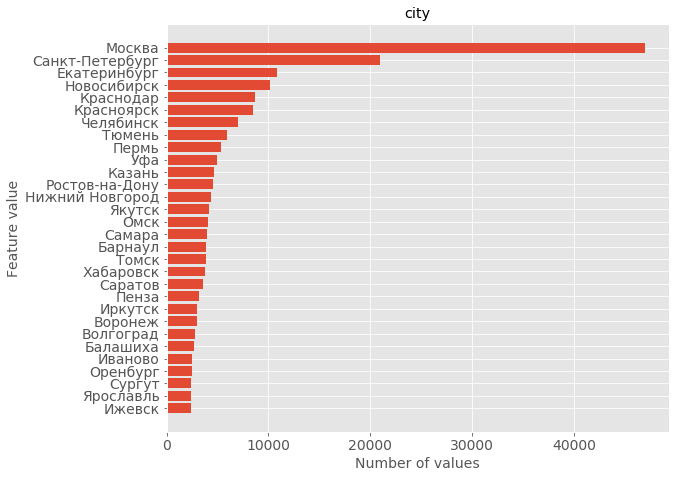

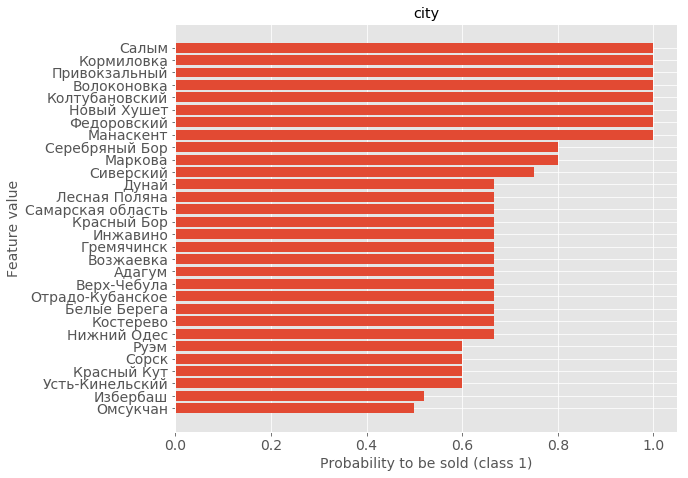

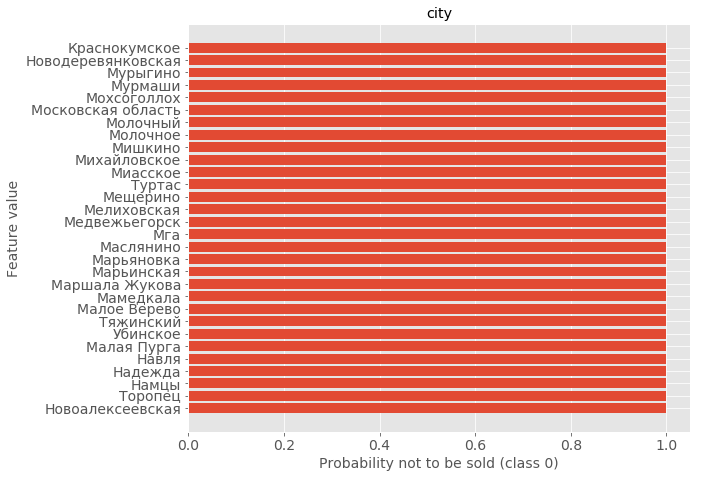

In [0]:
unique_values_bars(df, 'city', n_top=30)

Number of unique values:  109


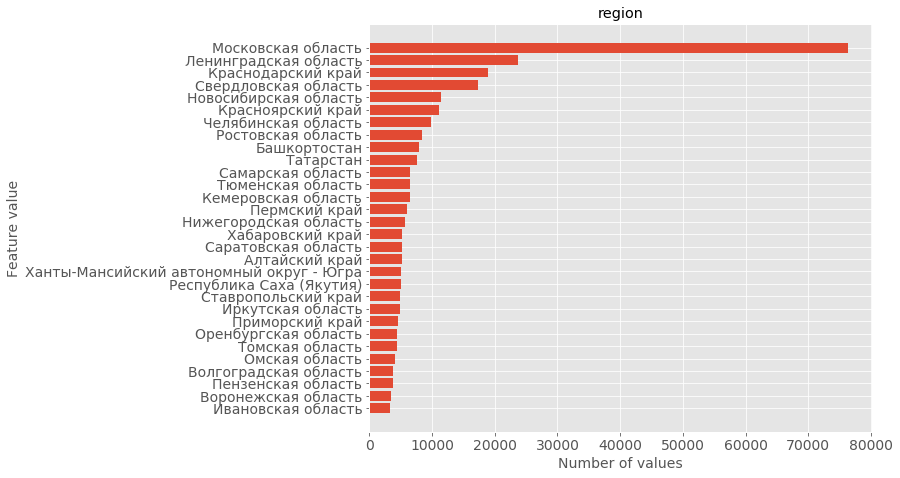

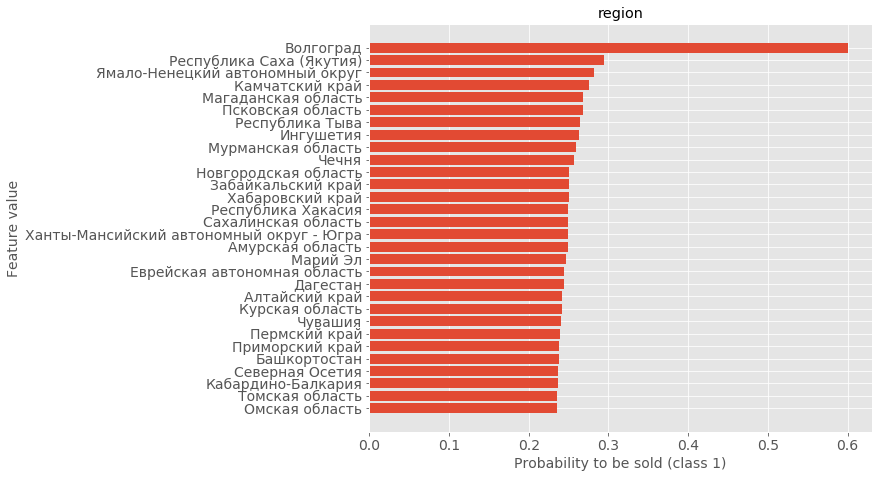

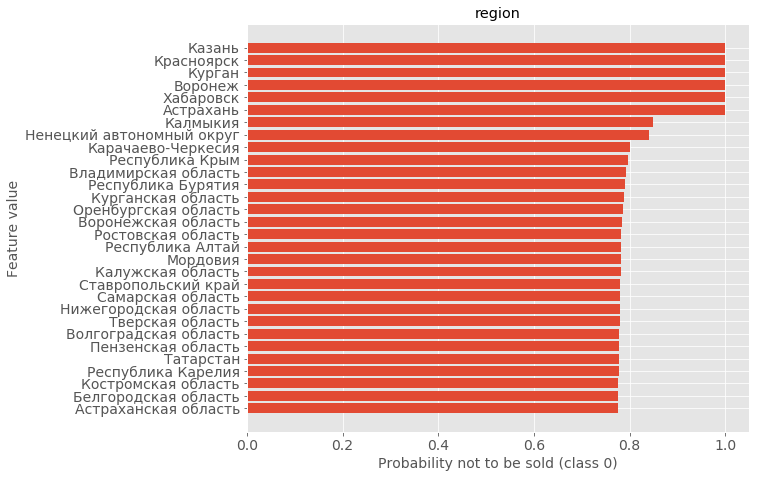

In [0]:
unique_values_bars(df, 'region', n_top=30)

Number of unique values:  2


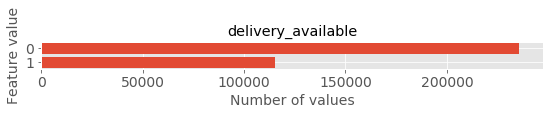

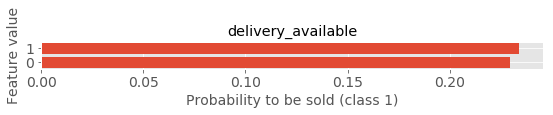

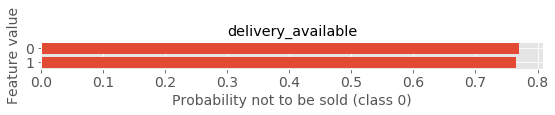

In [0]:
unique_values_bars(df, 'delivery_available', n_top=30)

Number of unique values:  2


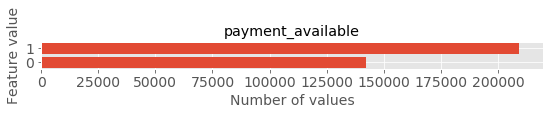

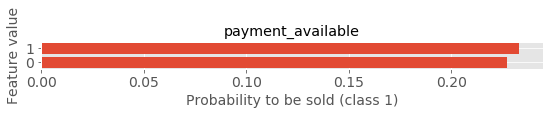

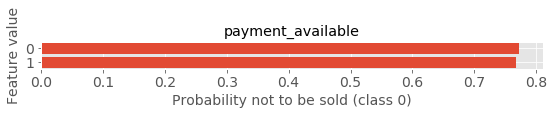

In [0]:
unique_values_bars(df, 'payment_available', n_top=30)

Number of unique values:  3


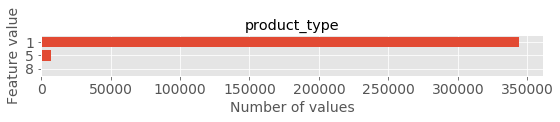

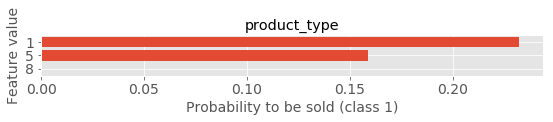

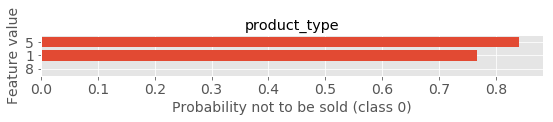

In [0]:
unique_values_bars(df, 'product_type')

Number of unique values:  2


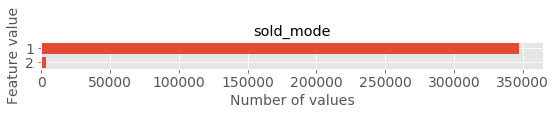

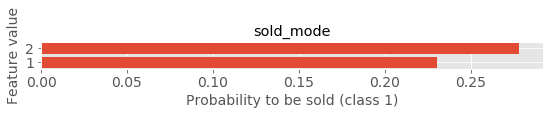

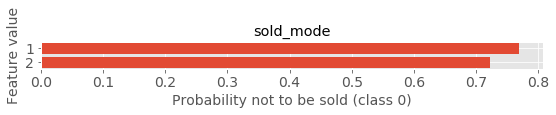

In [0]:
unique_values_bars(df, 'sold_mode', n_top=15)

**From the plots above we can conclude that:**
* **objects with *category_id* value of 21, 23, 24, 9, 25, 22, 8 or 14 are likely to have class 0**
* **objects with *subcategory_id* value of 2013, 2409, 2413, 2415 or 2410 have label 0, and of 1003, 2426 or 2424 are likely to have class 1**
* **objects with *city* value of Салым, Кормиловка, Привокзальный, Волоконовка, Колтубановский, Новый Хушет, Федоровский, Манаскент  have class 1, and a lot of values have only class 0**
* **objects with *region* value of Астрахань, Воронеж, Красноярск, Курган, Хабаровск or Казань have class 0, and Волгоград - likely class 1**
* **other features do not influence on target variable siginificantly**

# (almost) Zero-knowledge prediction
* Develop non-machine learning approach to get predictions
    * Describe it and measure its quality on Kaggle

In [0]:
zero_df = df.copy() 
zero_df = zero_df.assign(pred = lambda x: 0)

# with class 1
features_1 = {'subcategory_id': [1003, 2426, 2424],
              'city': ['Салым', 'Кормиловка', 'Привокзальный', 'Волоконовка', 'Колтубановский', 'Новый Хушет', 'Федоровский', 'Манаскент'],
              'region': ['Волгоград']}

for col, vals in features_1.items():
  for val in vals:
    zero_df.loc[zero_df[col] == val, 'pred'] = 1

In [0]:
from sklearn.metrics import f1_score

print('f1:', f1_score(zero_df['sold_fast'], zero_df['pred']))

f1: 0.005764961301164032


**F1 score with zero-knowledge prediction is very poor. We need to reveal complex dependecies with machine learning methods**

# Machine-learning pipeline and prediction

Here you develop your pipeline, generate features for train and test sets
* Your pipeline should be reproducible - make sure you set all `random_states` if needed

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
!wget https://www.dropbox.com/s/mbkjgb4p3ymm1ds/train.tsv

--2019-06-14 18:34:17--  https://www.dropbox.com/s/mbkjgb4p3ymm1ds/train.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mbkjgb4p3ymm1ds/train.tsv [following]
--2019-06-14 18:34:17--  https://www.dropbox.com/s/raw/mbkjgb4p3ymm1ds/train.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc311daafd20853c99e616a2be58.dl.dropboxusercontent.com/cd/0/inline/Ai197QnUo9QZ2uqb3gKchdEvFqJltIa8H8M294SvonnOo9Ll3Ecr0M5eXvczcFEcnRkx3v0n5m4Qp5vM8WXMy_BSgfjRerc6XkYfDliL4ZhVaA/file# [following]
--2019-06-14 18:34:17--  https://uc311daafd20853c99e616a2be58.dl.dropboxusercontent.com/cd/0/inline/Ai197QnUo9QZ2uqb3gKchdEvFqJltIa8H8M294SvonnOo9Ll3Ecr0M5eXvczcFEcnRkx3v0n5m4Qp5vM8WXMy_BSgfjRerc6XkYfDliL4ZhVaA/file
Resolving uc311daafd20853c99

In [4]:
!wget https://www.dropbox.com/s/w1i9jwao7xv0ya4/test_nolabel.tsv

--2019-06-14 18:34:25--  https://www.dropbox.com/s/w1i9jwao7xv0ya4/test_nolabel.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w1i9jwao7xv0ya4/test_nolabel.tsv [following]
--2019-06-14 18:34:25--  https://www.dropbox.com/s/raw/w1i9jwao7xv0ya4/test_nolabel.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd2da1899537f138a4271cd3df.dl.dropboxusercontent.com/cd/0/inline/Ai1WYkkrFThIQmhll5z5dMS6X-Y_Y5VZeg1B2S6HWZnlJKMEmNwOyuUjUZnvYgHnhrVVNjLy4axShrT1SmrvWsp1k-LLkfDRC4_1XFM983JH2A/file# [following]
--2019-06-14 18:34:25--  https://ucdd2da1899537f138a4271cd3df.dl.dropboxusercontent.com/cd/0/inline/Ai1WYkkrFThIQmhll5z5dMS6X-Y_Y5VZeg1B2S6HWZnlJKMEmNwOyuUjUZnvYgHnhrVVNjLy4axShrT1SmrvWsp1k-LLkfDRC4_1XFM983JH2A/file
Resolvi

In [0]:
data = pd.read_csv('train.tsv', sep = '\t')

In [0]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.33, random_state=42)

y_train = data_train['sold_fast'].values
y_test = data_test['sold_fast'].values

## Preprocessing

In [0]:
def date2ymd(date):
    date_plitted = date.split('-')
    year = int(date_plitted[0])
    month = int(date_plitted[1])
    day = int(date_plitted[2])
    return [month, day]

def cat2proba_dict(values, labels):
    cat_dict = {}
    probas = []
    for aval in np.unique(values):
        labels_for_val = labels[values == aval]
        n = len(labels_for_val)
        n_1 = len(labels_for_val[labels_for_val == 1])
        p = 1.0 * n_1 / n
        cat_dict[aval] = p
    return cat_dict

def cat2proba(cat_dict, values):
    probas = []
    for aval in values:
        if aval in cat_dict:
            probas.append(cat_dict[aval])
        else:
            probas.append(0)
    return np.array(probas)

In [0]:
category_id_dict = cat2proba_dict(data_train['category_id'].values, y_train)
subcategory_id_dict = cat2proba_dict(data_train['subcategory_id'].values, y_train)

city_dict = cat2proba_dict(data_train['city'].values, y_train)
region_dict = cat2proba_dict(data_train['region'].values, y_train)

In [0]:
cat = data_train[['category_id']].values
subcat = data_train[['subcategory_id']].values
super_cat = subcat * 1000 + cat


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe_category_id = OneHotEncoder(handle_unknown='ignore')
ohe_category_id.fit(data_train['category_id'].values.reshape(-1, 1))


ohe_subcategory_id = OneHotEncoder(handle_unknown='ignore')
ohe_subcategory_id.fit(data_train['subcategory_id'].values.reshape(-1, 1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

name_text = data_train['name_text'].values
vectorizer_name_text = CountVectorizer(max_features=30, decode_error='ignore')
vectorizer_name_text.fit(name_text)

desc_text = data_train['desc_text'].values
vectorizer_desc_text = CountVectorizer(max_features=30, decode_error='ignore')
vectorizer_desc_text.fit(desc_text)

CountVectorizer(analyzer='word', binary=False, decode_error='ignore',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=30, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
from gensim.models import Word2Vec

In [0]:
model_city = Word2Vec(data_train.city.apply(lambda x: [x]), size=1, window=5, min_count=3, workers=4, seed=42)
city_word2vec = dict(zip(model_city.wv.index2word, model_city.wv.vectors))

model_region = Word2Vec(data_train.region.apply(lambda x: [x]), size=1, window=5, min_count=3, workers=4, seed=42)
region_word2vec = dict(zip(model_region.wv.index2word, model_region.wv.vectors))

In [0]:
def w2v(column, d):
  return column.apply(lambda x: d[x][0] if x in d else 0.0).values.reshape(-1,1)

In [0]:
def preprocessing(data):
    return np.concatenate((
        data[['price', 'product_type', 'sold_mode', 'img_num']].values,
        np.array([date2ymd(i) for i in data['date_created'].values]),
        data[['payment_available', 'delivery_available']].values * 1.,
        w2v(data.city, city_word2vec),
        w2v(data.region, region_word2vec),
        ohe_category_id.transform(data['category_id'].values.reshape(-1, 1)).toarray(),
        ohe_subcategory_id.transform(data['subcategory_id'].values.reshape(-1, 1)).toarray(),
        vectorizer_name_text.transform(data['name_text'].values).toarray(),
        vectorizer_desc_text.transform(data['desc_text'].values).toarray()
    ), axis=1)

In [0]:
X_train = preprocessing(data_train)
X_test = preprocessing(data_test)

## Classification

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [22]:
clf = XGBClassifier(seed=42, n_estimators=600, learning_rate=0.04, max_depth=8, n_jobs=4, 
                    colsample_bytree=0.56, scale_pos_weight=1., subsample=0.5, silent=False, eval_metric='error')

clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

print("Train AUC: ", auc_train)
print("Test AUC: ", auc_test)

Train AUC:  0.7327711879797285
Test AUC:  0.6410321721586775


# Model interpretation
Try to interpret your model results
* What **knowledge** does it reveal?

In [27]:
clf.feature_importances_.shape

(374,)

In [0]:
def preprocessing_shapes(data):
  return [i.shape for i in (data[['price', 'product_type', 'sold_mode', 'img_num']].values,
        np.array([date2ymd(i) for i in data['date_created'].values]),
        data[['payment_available', 'delivery_available']].values * 1.,
        w2v(data.city, city_word2vec),
        w2v(data.region, region_word2vec),
        ohe_category_id.transform(data['category_id'].values.reshape(-1, 1)).toarray(),
        ohe_subcategory_id.transform(data['subcategory_id'].values.reshape(-1, 1)).toarray(),
        vectorizer_name_text.transform(data['name_text'].values).toarray(),
        vectorizer_desc_text.transform(data['desc_text'].values).toarray())]

In [0]:
shapes = np.array([
    1, #price
    1, #product type
    1, #sold mode
    1, #img num
    1, #date month
    1, #date day
    1, #payment available
    1, #delivery_available
    1, #city vector
    1, #region vector
    24, #category id
    280, #subcategory id
    30, #name text
    30 #description text
]) 

In [0]:
shape_inds = [shapes[:i+1].sum() for i in range(shapes.shape[0])]

In [61]:
shape_inds

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 34, 314, 344, 374]

In [73]:
importances[10].shape

(24,)

In [0]:
importances = []
importances.append(clf.feature_importances_[0: shape_inds[0]])
for i in range(shapes.shape[0] -1):
  importances.append(clf.feature_importances_[shape_inds[i]: shape_inds[i+1]])
importances = np.array(importances)

In [0]:
labels = ["price",
"product type",
"sold mode",
"img num",
"date month",
"date day",
"payment available",
"delivery_available",
"city vector",
"region vector",
"category id",
"subcategory id",
"name text",
"description text"]

In [98]:
for i in range(len(labels)):
  if (importances[i].shape[0]>1):
    # vector feature
    print("%-20s (vector) max importance = %f, mean importance = %f, importance sum = %f" %(labels[i].title(), importances[i].max(), importances[i].mean(), importances[i].sum()))
  else:
    print("%-20s importance = %f" % (labels[i].title(), importances[i][0]))

Price                importance = 0.002861
Product Type         importance = 0.002795
Sold Mode            importance = 0.003037
Img Num              importance = 0.001651
Date Month           importance = 0.002747
Date Day             importance = 0.002131
Payment Available    importance = 0.001793
Delivery_Available   importance = 0.001984
City Vector          importance = 0.001838
Region Vector        importance = 0.001736
Category Id          (vector) max importance = 0.016778, mean importance = 0.004978, importance sum = 0.119480
Subcategory Id       (vector) max importance = 0.015001, mean importance = 0.002551, importance sum = 0.714363
Name Text            (vector) max importance = 0.006153, mean importance = 0.002799, importance sum = 0.083962
Description Text     (vector) max importance = 0.002686, mean importance = 0.001987, importance sum = 0.059622


In [93]:
ohe_category_id.categories_[0][importances[10].argmax()]

9

In [94]:
ohe_subcategory_id.categories_[0][importances[11].argmax()]

1202

We've found out, that there is some '9' category and '1202' subcategory that are most important for the prediction. Overall the category vector gives 12% of feature importances. The subcategory feature is the most important from the model point of view - it gives 71% contribution to the decision

Also name text (which is converted to 30 dim vector) has some important dimension, that's 3 times more important than features like price, product type etc.

Description text seems to be not so important, as it's importance value is close to 6%.

Features like price, product type, sold mode, date are equally non important for the prediction

